# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#from sklearn.preprocessing import LabelEncoder 

In [4]:
df = pd.read_csv('telecom_users.csv')
del df['Unnamed: 0']
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [5]:
# Выведем все уникальные значения каждого столбца
for col in df:
    print(col, ":  ", df[col].unique())

customerID :   ['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
gender :   ['Male' 'Female']
SeniorCitizen :   [0 1]
Partner :   ['Yes' 'No']
Dependents :   ['Yes' 'No']
tenure :   [72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 26 31  7 35  6 13 23  9
 45 17 34 58 12 25 28 29 43 19 41 37 27 22 24 18 56 66 59 48 47 61 21  0
 36]
PhoneService :   ['Yes' 'No']
MultipleLines :   ['Yes' 'No' 'No phone service']
InternetService :   ['No' 'Fiber optic' 'DSL']
OnlineSecurity :   ['No internet service' 'No' 'Yes']
OnlineBackup :   ['No internet service' 'Yes' 'No']
DeviceProtection :   ['No internet service' 'Yes' 'No']
TechSupport :   ['No internet service' 'No' 'Yes']
StreamingTV :   ['No internet service' 'Yes' 'No']
StreamingMovies :   ['No internet service' 'No' 'Yes']
Contract :   ['Two year' 'Month-to-month' 'One year']
PaperlessBilling :   ['No' 'Yes']
PaymentMethod :   ['Credi

In [6]:
# Преобразую категориальные признаки в числовые
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
        
# Преобразую string в числа
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   int16  
 1   gender            5986 non-null   int8   
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   int8   
 4   Dependents        5986 non-null   int8   
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   int8   
 7   MultipleLines     5986 non-null   int8   
 8   InternetService   5986 non-null   int8   
 9   OnlineSecurity    5986 non-null   int8   
 10  OnlineBackup      5986 non-null   int8   
 11  DeviceProtection  5986 non-null   int8   
 12  TechSupport       5986 non-null   int8   
 13  StreamingTV       5986 non-null   int8   
 14  StreamingMovies   5986 non-null   int8   
 15  Contract          5986 non-null   int8   
 16  PaperlessBilling  5986 non-null   int8   


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4252,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1066,0
1,5806,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,2901,0
2,5577,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2126,1
3,4243,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,1270,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,308,0


In [8]:
# Сохраним подготовленные данные
df.to_csv('df_parsing.csv')

In [9]:
# Загрузим подготовленные данные
df = pd.read_csv('df_parsing.csv')

del df['Unnamed: 0']
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4252,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1066,0
1,5806,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,2901,0
2,5577,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2126,1
3,4243,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,1733,0
4,1270,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,308,0


## Вывод по описанию данных
1. Всего строк данных - 5986. 
2. Столбцов - 21.
3. Nan отсутсвуют.
4. Столбец "TotalCharges" преобразовал из типа object в тип float64
5. Категориальные столбцы преобразованы в числовые


In [31]:
df.columns[1:5]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

# 2. Исследование зависимостей и формулирование гипотез

Wall time: 2min 43s


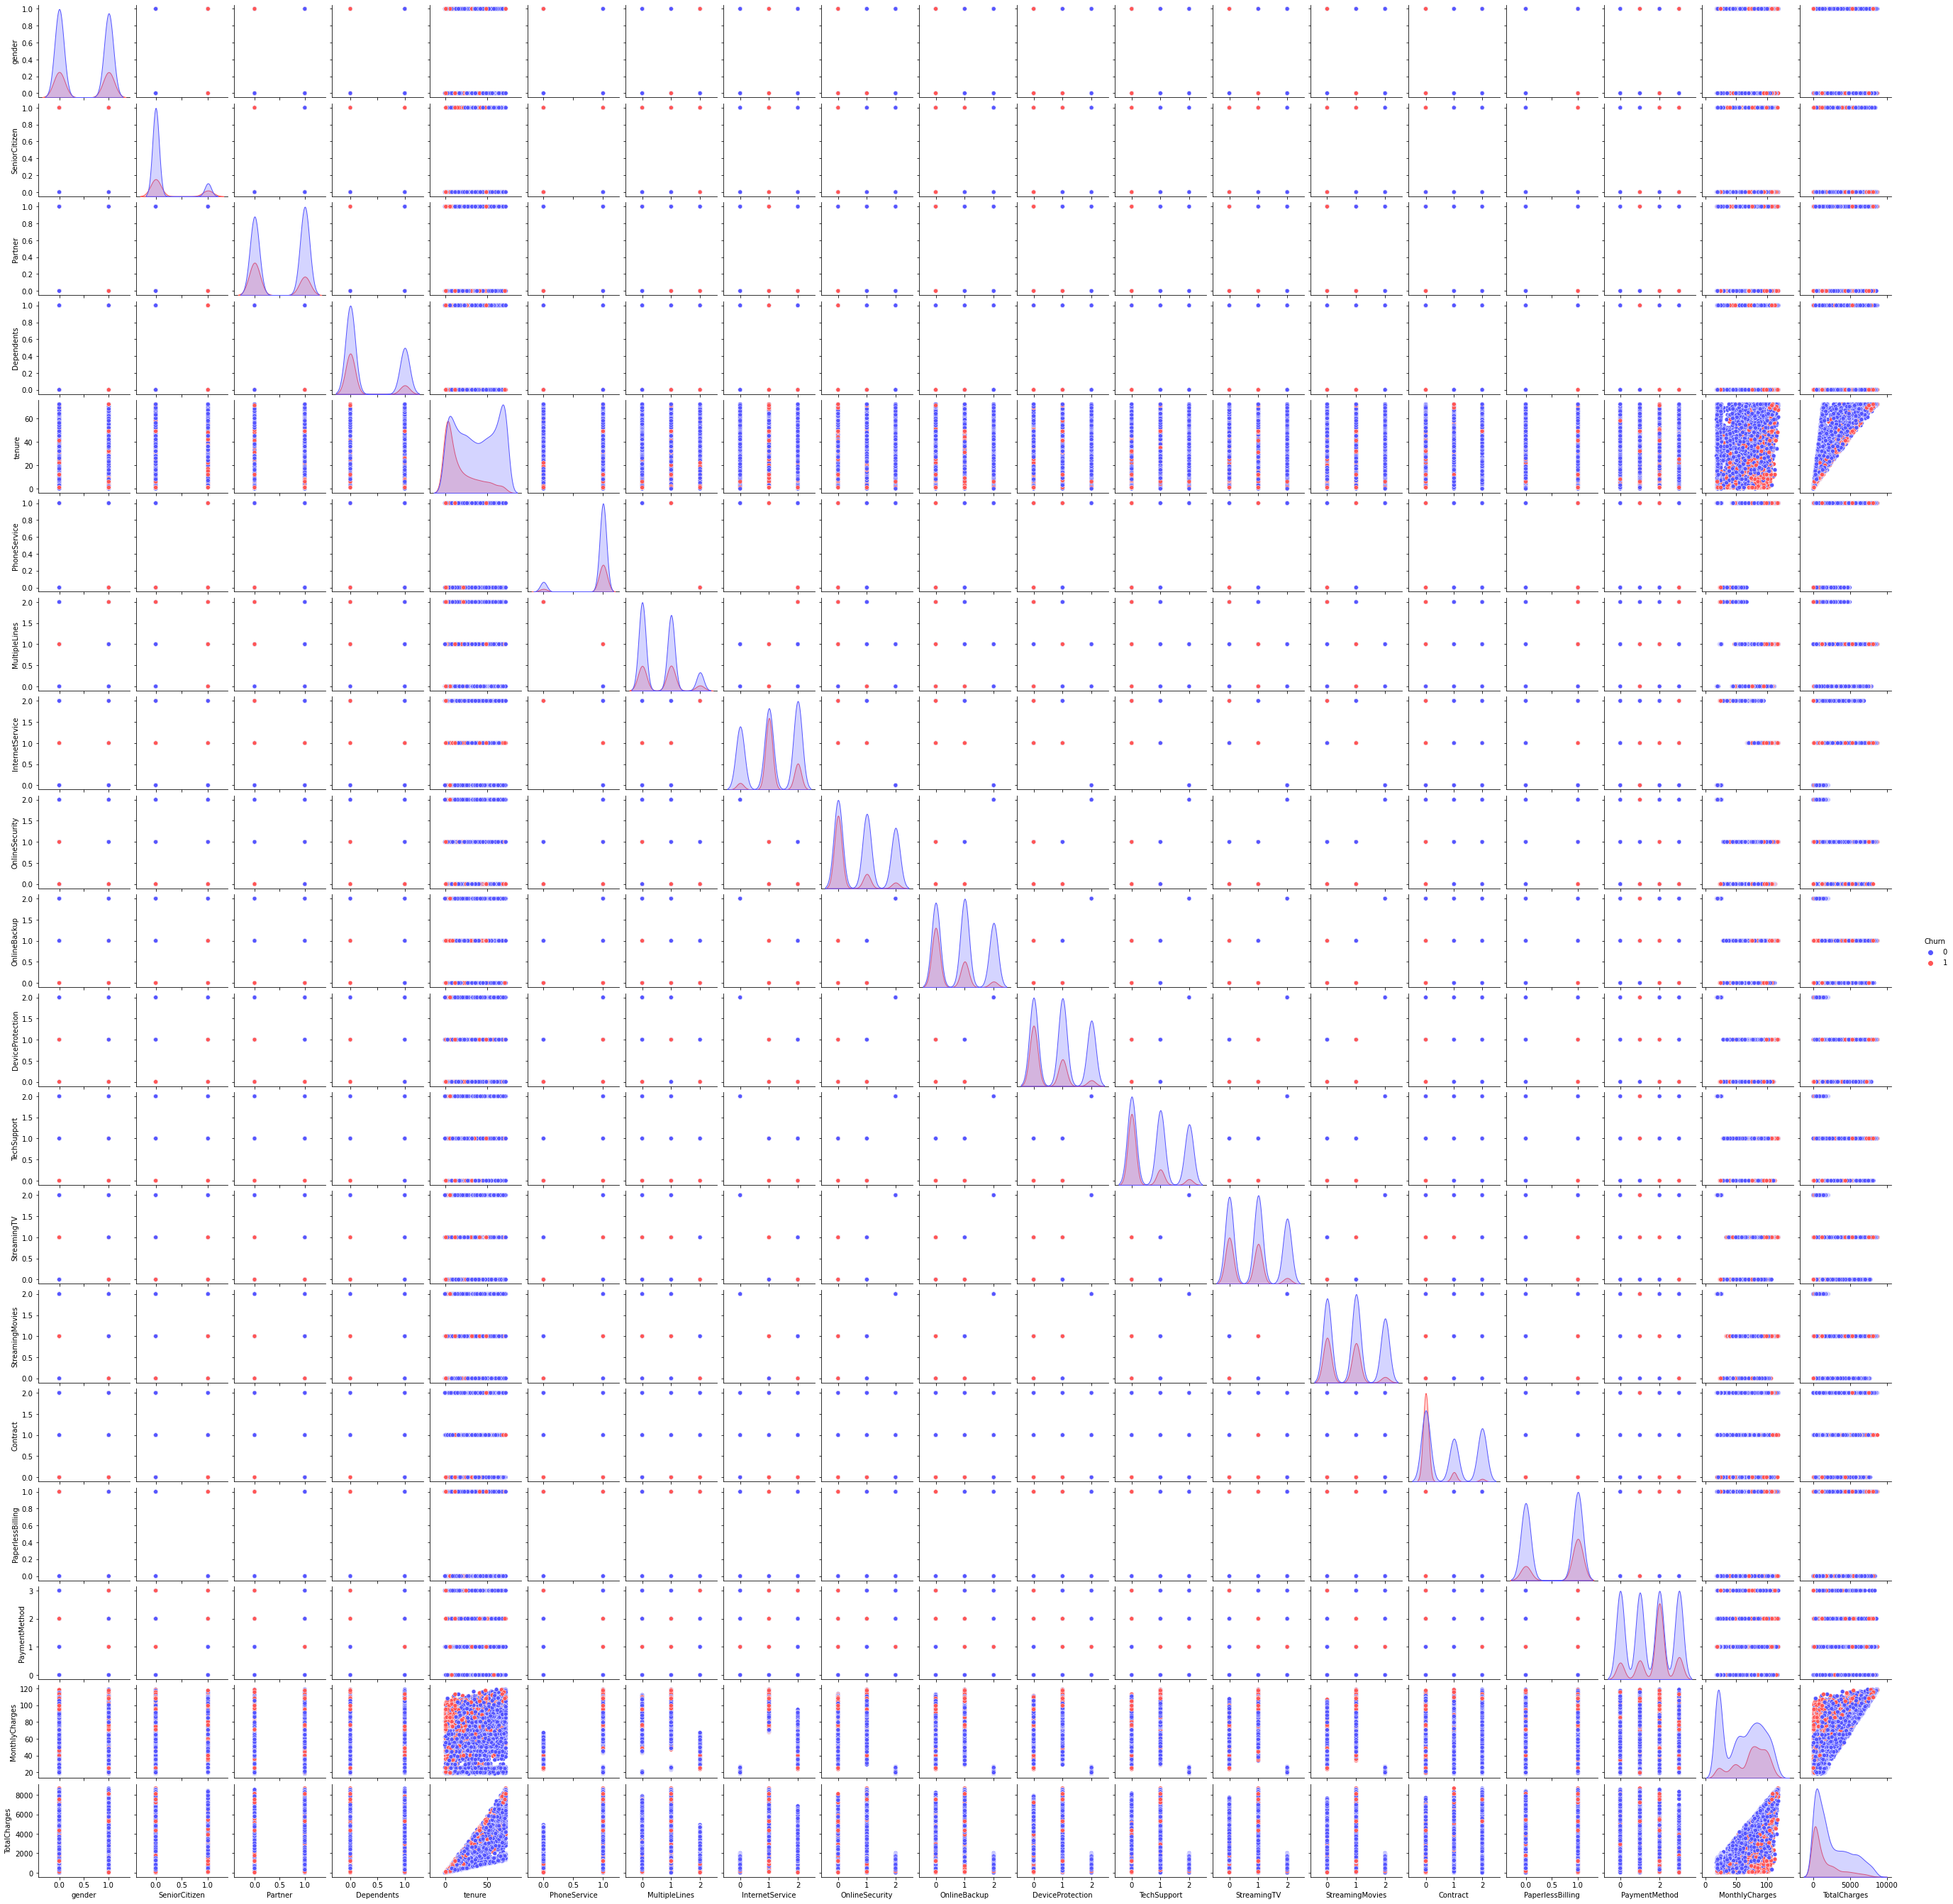

In [8]:
%%time
sns.pairplot( df.iloc[:, 1:], 
                 hue='Churn', palette = 'seismic', size=2)

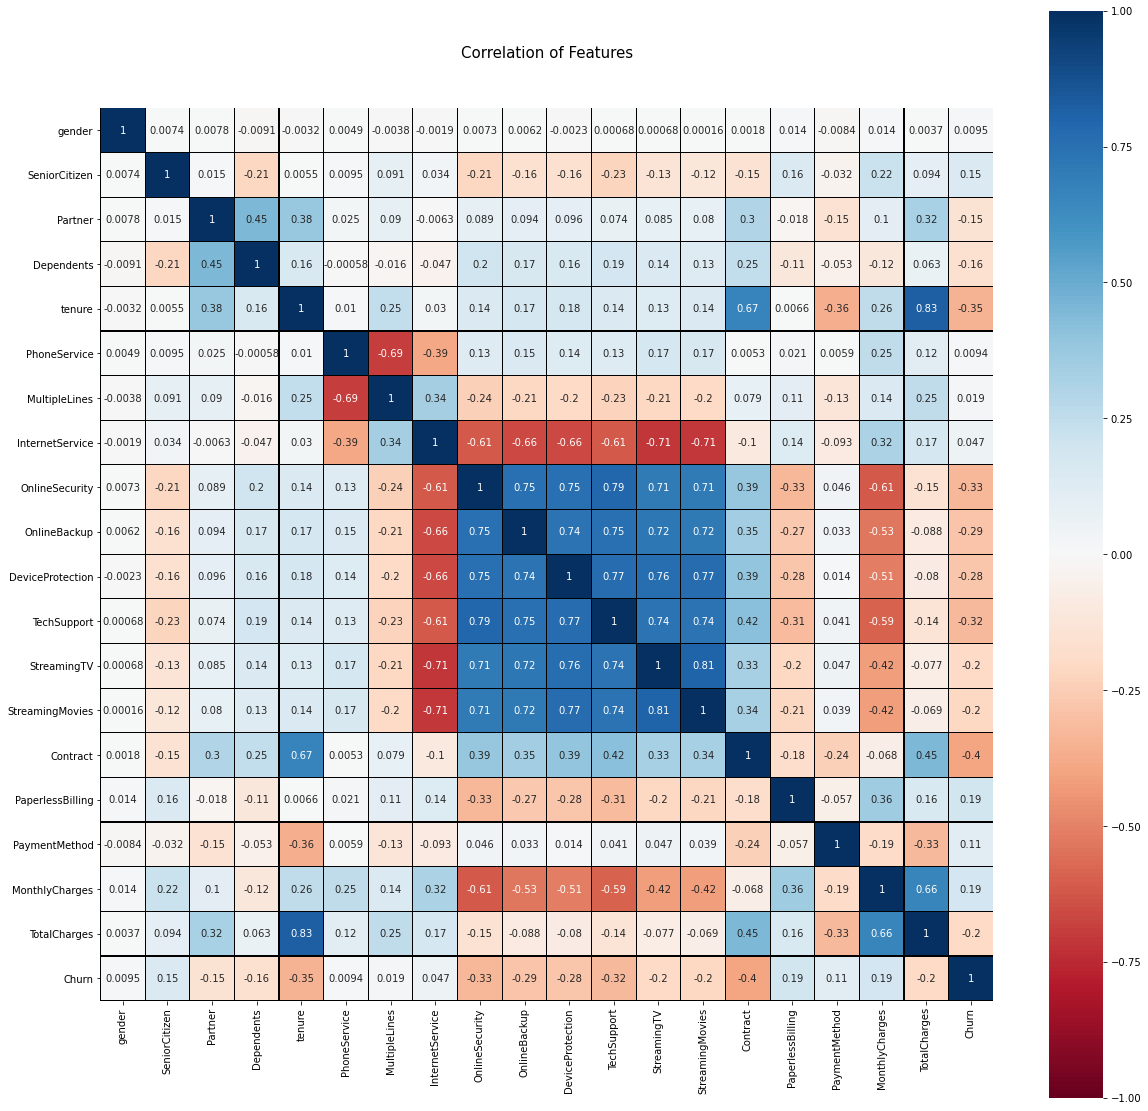

In [47]:
# Найдем взаимосвязанные характеристики
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:, 1:].corr(),linewidths=0.1,vmax=1.0,  vmin=-1.0,
            square=True, cmap=colormap, linecolor='black', annot=True)

plt.show()

## Вывод по исследованию зависимостей и формулированию гипотез
**ЗАВИСИМОСТИ:**
1. Четко прослеживаются прямая зависимость (корреляци 0,75) между столбцами: 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.
2. Четко прослеживаются отрицательная зависимость (корреляци -0,61...-0,71) между InternetService и столбцами  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'.
3. Высокая корреляция между 'tenure' и 'TotalCharges', что логично, так как чем дольше человек клиент, тем больше итоговая сумма.

**ГИПОТЕЗЫ:**
<br>**Гипотеза 1:**</br>
Все параметры влияют на результат.

**Гипотеза 2:**
1. Чем меньше месяцев человек был клиентом (tenure), тем выше вероятность того, что он уйдет.
2. Если конттракт на месяц, то высока вероятность, что человек уйдет (Contract - "Month-to-Month").
3. Больше отток у тех, кто оплачивает электронно не автоматически (PaymentMethod - 'ElectronicCheck').
4. Отток у тех, у кого больше месячная оплата (MonthlyCharges) - повыше, чем у тех, у кого она ниже.

# 3. Построение моделей для прогнозирования оттока

In [12]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score
from sklearn.model_selection import cross_val_predict


<br>**Обучение по Гипотезе 1:**</br>
Все параметры влияют на результат.


In [11]:
#3.1.1 Разобьем данные на обучающую и тестовую выборки
X = df.drop(['customerID','Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.25, stratify=y, random_state=17)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4489, 19), (1497, 19), (4489,), (1497,))

In [14]:
#3.1.2 Базовые Алгоритмы
dtc = DecisionTreeClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)
svc = SVC(random_state=17)
gbc = GradientBoostingClassifier(random_state=17)
lr = LogisticRegression(random_state=17)
knc = KNeighborsClassifier()

#meta = XGBClassifier(n_estimators=40, random_state=17)

In [16]:
#3.1.3 Параметры базовых алгоритмов
dtc_params = {'max_depth': np.arange(1, 21, 1)}

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(0, 21, 1), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.5, 1, 0.1)}

knc_params = {'n_neighbors': np.arange(2, 20, 1)}

skf = StratifiedKFold(n_splits=5, random_state=17)

In [17]:
#3.1.4 Создание списка моделей
models = [dtc, rfc, gbc, lr, knc] #[dtc, rfc, svc, gbc, lr]
model_params = [dtc_params, rfc_params, gbc_params, lr_params, knc_params] #[dtc_params, rfc_params, svc_params, gbc_params, lr_params]

In [18]:
%%time
#3.1.5 Поиск лучших параметров при GridSearchCV  для каждой модели
best_params = [] # Лучшие параметры
best_estimators = []

for model, model_param in zip(models, model_params):
    #1) Задание объекта GridSearchCV для каждой модели
    gsCV = GridSearchCV(model, param_grid=model_param, cv = skf) 
    
    #2) Выполняем обучение по GridSearchCV
    gsCV.fit(X_train, y_train)                                  
    
    #3) Лучшие параметры
    best_params.append(gsCV.best_params_)
    #4) Лучшие models
    best_estimators.append(gsCV.best_estimator_)
    print('Лучшие параметры модели: ', model)
    print(gsCV.best_params_, '\n\n')
    

Лучшие параметры модели:  DecisionTreeClassifier(random_state=17)
{'max_depth': 5} 


Лучшие параметры модели:  RandomForestClassifier(random_state=17)
{'min_samples_leaf': 3, 'n_estimators': 15} 


Лучшие параметры модели:  GradientBoostingClassifier(random_state=17)
{'learning_rate': 0.2} 


Лучшие параметры модели:  LogisticRegression(random_state=17)
{'C': 0.7999999999999999} 


Лучшие параметры модели:  KNeighborsClassifier()
{'n_neighbors': 12} 


Wall time: 1min 28s


**Обучение по Гипотезе 2:**
1. Чем меньше месяцев человек был клиентом (tenure), тем выше вероятность того, что он уйдет.
2. Если конттракт на месяц, то высока вероятность, что человек уйдет (Contract - "Month-to-Month").
3. Больше отток у тех, кто оплачивает электронно не автоматически (PaymentMethod - 'ElectronicCheck').
4. Отток у тех, у кого больше месячная оплата (MonthlyCharges) - повыше, чем у тех, у кого она ниже.

In [19]:
#3.2.1 Разобьем данные на обучающую и тестовую выборки
columns_hyp_2 = ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges']


X_train_hyp2, X_test_hyp2, y_train_hyp2, y_test_hyp2 = train_test_split(
        X[columns_hyp_2], y, test_size=.25, stratify=y, random_state=17)

X_train_hyp2.shape, X_test_hyp2.shape, y_train_hyp2.shape, y_test_hyp2.shape


((4489, 4), (1497, 4), (4489,), (1497,))

In [20]:
#3.2.2 Базовые Алгоритмы
dtc_hyp2 = DecisionTreeClassifier(random_state=17)
rfc_hyp2 = RandomForestClassifier(random_state=17)
svc_hyp2 = SVC(random_state=17)
gbc_hyp2 = GradientBoostingClassifier(random_state=17)
lr_hyp2 = LogisticRegression(random_state=17)
knc_hyp2 = KNeighborsClassifier()

#meta = XGBClassifier(n_estimators=40, random_state=17)

In [21]:
#3.2.4 Создание списка моделей
models_hyp2 = [dtc_hyp2, rfc_hyp2, gbc_hyp2, lr_hyp2, knc_hyp2] #[dtc, rfc, svc, gbc, lr]
model_params = [dtc_params, rfc_params, gbc_params, lr_params, knc_params] #[dtc_params, rfc_params, svc_params, gbc_params, lr_params]

In [22]:
%%time
#3.2.5 Поиск лучших параметров при GridSearchCV  для каждой модели
best_params_hyp2 = [] # Лучшие параметры
best_estimators_hyp2 = []

for model, model_param in zip(models_hyp2, model_params):
    #1) Задание объекта GridSearchCV для каждой модели
    gsCV = GridSearchCV(model, param_grid=model_param, cv = skf) 
    
    #2) Выполняем обучение по GridSearchCV
    gsCV.fit(X_train_hyp2, y_train_hyp2)                                  
    
    #3) Лучшие параметры
    best_params_hyp2.append(gsCV.best_params_)
    #4) Лучшие models
    best_estimators_hyp2.append(gsCV.best_estimator_)
    print('Лучшие параметры модели: ', model)
    print(gsCV.best_params_, '\n\n')
    

Лучшие параметры модели:  DecisionTreeClassifier(random_state=17)
{'max_depth': 3} 


Лучшие параметры модели:  RandomForestClassifier(random_state=17)
{'min_samples_leaf': 4, 'n_estimators': 20} 


Лучшие параметры модели:  GradientBoostingClassifier(random_state=17)
{'learning_rate': 0.1} 


Лучшие параметры модели:  LogisticRegression(random_state=17)
{'C': 0.5} 


Лучшие параметры модели:  KNeighborsClassifier()
{'n_neighbors': 12} 


Wall time: 1min 8s


# Выводы по обученным моделям

1. SVC обучить не удалось. Расчет занимает длительное время.
2. Остальные модель обучились достаточно быстро. 

# 4. Сравнение качества моделей 

<br>**Валидация по Гипотезе 1:**</br>
Все параметры влияют на результат.


In [24]:
# Получение предсказания на валидационных данных 
for best_estimator, model in zip(best_estimators, models):
    roc_auc = roc_auc_score(y_test, best_estimator.predict(X_test))
    recall = recall_score(y_test, best_estimator.predict(X_test))
    print('ROC-AUC для модели', str(model)[:-17], ':', roc_auc)
    print('Recall для модели', str(model)[:-17], ':', recall)
    print('')


ROC-AUC для модели DecisionTreeClassifier : 0.7279299290130524
Recall для модели DecisionTreeClassifier : 0.5994962216624685

ROC-AUC для модели RandomForestClassifier : 0.6908667277307076
Recall для модели RandomForestClassifier : 0.473551637279597

ROC-AUC для модели GradientBoostingClassifier : 0.7053171513624914
Recall для модели GradientBoostingClassifier : 0.5088161209068011

ROC-AUC для модели LogisticRegression : 0.7089248912296771
Recall для модели LogisticRegression : 0.5314861460957179

ROC-AUC для модели KNeig : 0.5982550950309137
Recall для модели KNeig : 0.2619647355163728



**Валидация по Гипотезе 2**

In [25]:
# Получение предсказания на валидационных данных 
for best_estimator, model in zip(best_estimators_hyp2, models_hyp2):
    roc_auc = roc_auc_score(y_test_hyp2, best_estimator.predict(X_test_hyp2))
    recall = recall_score(y_test_hyp2, best_estimator.predict(X_test_hyp2))
    print('ROC-AUC для модели', str(model)[:-17], ':', roc_auc)
    print('Recall для модели', str(model)[:-17], ':', recall)
    print('')


ROC-AUC для модели DecisionTreeClassifier : 0.6435951454087474
Recall для модели DecisionTreeClassifier : 0.3526448362720403

ROC-AUC для модели RandomForestClassifier : 0.6911506755209526
Recall для модели RandomForestClassifier : 0.48866498740554154

ROC-AUC для модели GradientBoostingClassifier : 0.7030444240897641
Recall для модели GradientBoostingClassifier : 0.5088161209068011

ROC-AUC для модели LogisticRegression : 0.6849954201969316
Recall для модели LogisticRegression : 0.4836272040302267

ROC-AUC для модели KNeig : 0.6609903824135562
Recall для модели KNeig : 0.4156171284634761



## Выводы по сравнению гипотез и моделей

1. Гипотеза 1 дала лучший результат, чем гипотеза 2.
2. GradientBoosting дал схожие результаты в обеих гипотезах.
<br>**В Гипотезе один:**</br>
1. DecisionTreeClassifier - дала лучший результат, как по показателю ROC-AUC, так и по Recall.
2. В качестве критерия качества, предпочел бы выбрать Recall (Полнота), 
так как большее значение имеет не пропустить тех, кто из клиентов уйдет.
3. Значение полноты в 0.5994 выглядит малым. Качество обучения модели сильно низкое. 
Почти половину человек, что планируют отток модель пропускает.


# 5. Решим задачу с применением Boosting

In [105]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

params = {'objective': 'binary:logistic',
          'max_depth': 20,
          'eta': 0.1}

num_rounds = 300

In [106]:
xgb_model = xgb.train(params, dtrain=dtrain, num_boost_round=num_rounds)
xgb_model

evals = [(dtest, 'test'),  (dtrain, 'train')]
xgb_model = xgb.train(params, dtrain=dtrain, num_boost_round=num_rounds, evals=evals)

[21:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:00:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	test-logloss:0.65251	train-logloss:0.63632
[1]	test-logloss:0.62047	train-logloss:0.58944
[2]	test-logloss:0.59354	train-logloss:0.54920
[3]	test-logloss:0.57146	train-logloss:0.51431
[4]	test-logloss:0.55235	train-logloss:0.48377
[5]	test-logloss:0.53621	train-logloss:0.45663
[6]	test-logloss:0.52306	train-logloss:0.43269
[7]	test-logloss:0.51184	train-logloss:0.41066
[8]	

[156]	test-logloss:0.54630	train-logloss:0.04427
[157]	test-logloss:0.54710	train-logloss:0.04401
[158]	test-logloss:0.54813	train-logloss:0.04376
[159]	test-logloss:0.54876	train-logloss:0.04349
[160]	test-logloss:0.54966	train-logloss:0.04325
[161]	test-logloss:0.55006	train-logloss:0.04312
[162]	test-logloss:0.55076	train-logloss:0.04285
[163]	test-logloss:0.55120	train-logloss:0.04261
[164]	test-logloss:0.55131	train-logloss:0.04250
[165]	test-logloss:0.55188	train-logloss:0.04226
[166]	test-logloss:0.55248	train-logloss:0.04203
[167]	test-logloss:0.55310	train-logloss:0.04184
[168]	test-logloss:0.55342	train-logloss:0.04167
[169]	test-logloss:0.55395	train-logloss:0.04152
[170]	test-logloss:0.55433	train-logloss:0.04136
[171]	test-logloss:0.55451	train-logloss:0.04129
[172]	test-logloss:0.55535	train-logloss:0.04105
[173]	test-logloss:0.55549	train-logloss:0.04092
[174]	test-logloss:0.55624	train-logloss:0.04073
[175]	test-logloss:0.55654	train-logloss:0.04066
[176]	test-logloss:0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

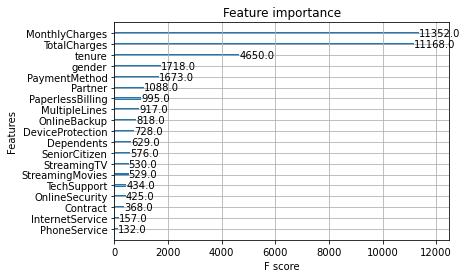

In [109]:
xgb.plot_importance(xgb_model)

In [107]:
result = xgb_model.predict(dtest)
y_pred = result > 0.5
y_pred

array([False, False, False, ..., False, False, False])

In [108]:
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('ROC-AUC для модели xgboost:', roc_auc)
print('Recall для модели xgboost:', recall)
print('')

ROC-AUC для модели xgboost: 0.6894080604534004
Recall для модели xgboost: 0.5088161209068011



# 6. Решим задачу с применением Stacking
## 6.1 Через написанную функцию

In [45]:
def stacking(models, meta_alg, data_train, targets_train, data_test, targets_test=None, random_state=None, test_size=None, cv=5):
    if test_size is None:
        # определение матрицы meta_mtrx 
        meta_mtrx = np.empty((data_train.shape[0], len(models))) 
        # цикл, в котором заполняется meta_mtrx        
        for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=cv, method='predict')
            model.fit(data_train, targets_train)

        # Обучение мета-алгоритма
        meta_model = meta_alg.fit(meta_mtrx, targets_train)
        
        #Определение матрицы meta_mtrx_test
        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) 
        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
                
        # Предсказания мета-алгоритма для значений матрицы meta_mtrx_test
        meta_predict = meta_alg.predict(meta_mtrx_test)
                
        if targets_test is not None:
            print(f'\n\nStacking AUC на тестовых данных: {roc_auc_score(targets_test, meta_predict)}')
            
        # Вывод матрицы предсказаний
        print('\nМатрица предсказаний \n',meta_predict)
    
    elif test_size > 0 and test_size < 1:
        train, valid, train_true, valid_true = train_test_split(data_train, 
                                                        targets_train,
                                                        test_size=test_size,
                                                        random_state=random_state)
        meta_mtrx = np.empty((valid.shape[0], len(models))) # определение матрицы meta_mtrx (кол-во объектов и алгоритмов)
        
        # цикл, в котором заполняется meta_mtrx
        for n, model in enumerate(models):
            model.fit(train, train_true)
            meta_mtrx[:, n] = model.predict(valid)
            
        # Обучение мета-алгоритма
        meta_model = meta_alg.fit(meta_mtrx, valid_true)
        
        #Определение матрицы meta_mtrx_test
        meta_mtrx_test = np.empty((data_test.shape[0], len(models))) 

        for n, model in enumerate(models):
            meta_mtrx_test[:, n] = model.predict(data_test)
        
        # Предсказания мета-алгоритма для значений матрицы meta_mtrx_test
        meta_predict = meta_alg.predict(meta_mtrx_test)
        
        if targets_test is not None:
            print(f'\n\nStacking AUC на тестовых данных: {roc_auc_score(targets_test, meta_predict)}')
        
        #Вывод матрицы предсказаний   
        print('\nМатрица предсказаний \n',meta_predict)
        
    else:
        raise ValueError("test_size must be between 0 and 1")

In [53]:
meta = XGBClassifier(n_estimators=30)

In [54]:
stacking(best_estimators, meta_alg=meta, data_train=X_train, targets_train=y_train,\
         data_test=X_test, targets_test=y_test, random_state=17, test_size=0.3, cv=5)

[20:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Stacking AUC на тестовых данных: 0.6929974811083124

Матрица предсказаний 
 [0 0 0 ... 0 1 0]


## 6.2 Через встроенную функцию

In [42]:
from sklearn.ensemble import StackingClassifier

In [94]:
estimators = []
for i, estimator in enumerate(best_estimators):
    estimators.append((str(i), estimator))

estimators

[('0', DecisionTreeClassifier(max_depth=5, random_state=17)),
 ('1',
  RandomForestClassifier(min_samples_leaf=3, n_estimators=15, random_state=17)),
 ('2', GradientBoostingClassifier(learning_rate=0.2, random_state=17)),
 ('3', LogisticRegression(C=0.7999999999999999, random_state=17)),
 ('4', KNeighborsClassifier(n_neighbors=12))]

In [95]:
sc = StackingClassifier(estimators=estimators)

In [96]:
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('0',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=17)),
                               ('1',
                                RandomForestClassifier(min_samples_leaf=3,
                                                       n_estimators=15,
                                                       random_state=17)),
                               ('2',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           random_state=17)),
                               ('3',
                                LogisticRegression(C=0.7999999999999999,
                                                   random_state=17)),
                               ('4', KNeighborsClassifier(n_neighbors=12))])

In [98]:
y_pred =sc.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('ROC-AUC для модели StackingClassifier:', roc_auc)
print('Recall для модели StackingClassifier:', recall)
print('')

ROC-AUC для модели StackingClassifier: 0.7000996107167391
Recall для модели StackingClassifier: 0.4811083123425693



# Выводы:
1. Рассмотрено 2-е гипотезы. 
**Гипотеза 1:**  
Все параметры влияют на результат  
  
**Гипотеза 2:**
 - Чем меньше месяцев человек был клиентом (tenure), тем выше вероятность того, что он уйдет.  
 - Если конттракт на месяц, то высока вероятность, что человек уйдет (Contract - "Month-to-Month").  
 - Больше отток у тех, кто оплачивает электронно не автоматически (PaymentMethod - 'ElectronicCheck').  
 - Отток у тех, у кого больше месячная оплата (MonthlyCharges) - повыше, чем у тех, у кого она ниже.  

2. Выбрана первая гипотеза: "Все параметры влияют на результат".
3. Модель, выбранная в качестве решения, DecisionTreeClassifier(max_depth=5, random_state=17).
4. Результат данной модели:  
ROC-AUC для модели DecisionTreeClassifier : 0.7279299290130524  
Recall для модели DecisionTreeClassifier : 0.5994962216624685

